## import dependencies

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog

## load file using the gui popup

In [2]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load timestamp csv')

%gui tk

In [58]:
df = pd.read_csv(infiles[0])
df.tail(50)

,Experiment_Start,"(6, 'Stim_Start')","(7, 'Stim_Start')","(8, 'Stim_Start')","(9, 'Stim_Start')","(10, 'Stim_Start')","(11, 'Stim_Start')","(12, 'Stim_Start')","(13, 'Stim_Start')","(14, 'Stim_Start')",...,"(966, 'Stim_Start')","(967, 'Stim_Start')","(968, 'Stim_Start')","(969, 'Stim_Start')","(970, 'Stim_Start')","(971, 'Stim_Start')","(972, 'Stim_Start')","(973, 'Stim_Start')","(974, 'Stim_Start')","(975, 'Stim_Start')"
0,1.663787e+09,1.663787e+09,1.663787e+09,1.663787e+09,1.663787e+09,1.663787e+09,1.663787e+09,1.663787e+09,1.663787e+09,1.663787e+09,...,1.663788e+09,1.663788e+09,1.663788e+09,1.663788e+09,1.663788e+09,1.663788e+09,1.663788e+09,1.663788e+09,1.663788e+09,1.663788e+09


## compute time elapsed (detectable behavior start times)

In [59]:
# fmt = '%Y%m%d_%H:%M:%S:%f'
stim_time = []
tstamp_0 = df.iloc[0, 0]
for i in range(1, np.array(df).shape[1]):
#     print(i)
    try:
        
#         tstamp2 = datetime.strptime(np.array(df)[0, i], fmt)
        tstamp2 = np.array(df)[0, i]
        time_elapsed = tstamp2-tstamp_0
        stim_time.append(time_elapsed)
    except:
        pass

(0.0, 1312.9417197704315)

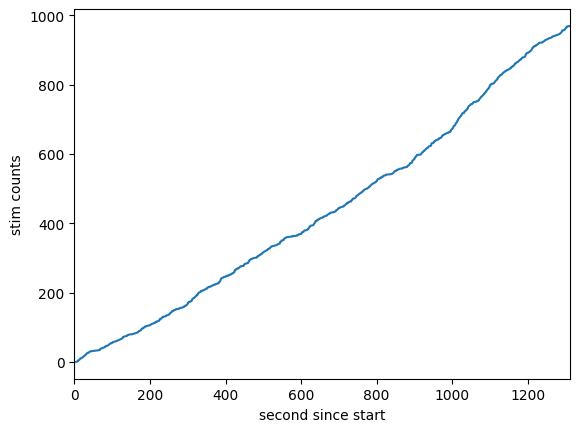

In [60]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(stim_time), np.arange(len(stim_time)))
ax.set_ylabel('stim counts')
ax.set_xlabel('second since start')
# ax.vlines(np.where(np.array(stim_time) > 300)[0][0], 0, (np.array(stim_time)).max())
ax.set_xlim([0, (np.array(stim_time)).max()])

### plot, and save

In [61]:
np.save('D:\Jack\Project\T14/092122/realtime_trial1_orientL_3.npy', np.array(stim_time))

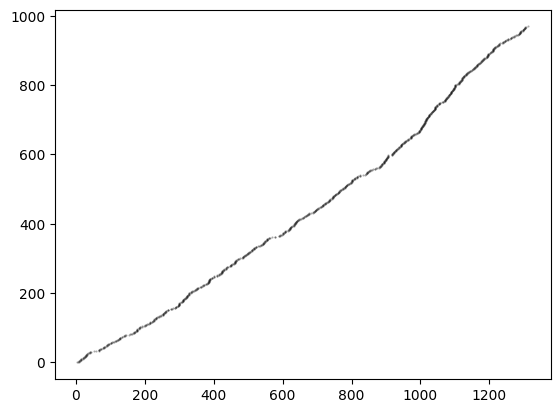

In [62]:
plt.scatter(stim_time, np.arange(len(stim_time)), c='k', s=0.3, alpha=0.3)

In [63]:
bin_start = np.arange(0, np.max(stim_time), 60)
bin_end = np.arange(60, np.max(stim_time)+60, 60)
print(bin_start, bin_end)
stim_binned_counts = []
for b in range(len(bin_start)):
    stim_binned_counts.append(len(np.where((stim_time >= bin_start[b]) & (stim_time < bin_end[b]))[0]))

[   0.   60.  120.  180.  240.  300.  360.  420.  480.  540.  600.  660.
  720.  780.  840.  900.  960. 1020. 1080. 1140. 1200. 1260.] [  60.  120.  180.  240.  300.  360.  420.  480.  540.  600.  660.  720.
  780.  840.  900.  960. 1020. 1080. 1140. 1200. 1260. 1320.]


<BarContainer object of 22 artists>

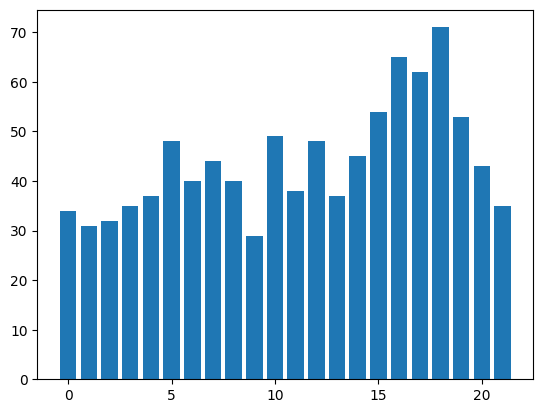

In [64]:
plt.bar(np.arange(len(stim_binned_counts)), stim_binned_counts)

In [55]:
len(stim_binned_counts)

10

In [56]:
print(f'animal performs this behavior around {np.mean(stim_binned_counts)/60}Hz')

animal performs this behavior around 0.6483333333333333Hz


## start time

In [26]:
start_time = df.iloc[0, 0]
tt = start_time
print(tt.rpartition('_')[2])

11:51:37:909643


In [27]:
start_seconds = tt.rpartition('_')[2].rpartition(':')[0].rpartition(':')[-1]
start_min = tt.rpartition('_')[2].rpartition(':')[0].rpartition(':')[0].rpartition(':')[-1]
start_hour = tt.rpartition('_')[2].rpartition(':')[0].rpartition(':')[0].rpartition(':')[0].rpartition(':')[-1]
print(f'start hour: {start_hour}; minute: {start_min}; second: {start_seconds} ')

start hour: 11; minute: 51; second: 37 


## first stim

In [28]:
stim1_time = df.iloc[0, 3]
tt1 = stim1_time
print(tt1.rpartition('_')[2])

11:51:44:693849


In [32]:
stim1_seconds = tt1.rpartition('_')[2].rpartition(':')[0].rpartition(':')[-1]
stim1_min = tt1.rpartition('_')[2].rpartition(':')[0].rpartition(':')[0].rpartition(':')[-1]
stim1_hour = tt1.rpartition('_')[2].rpartition(':')[0].rpartition(':')[0].rpartition(':')[0].rpartition(':')[-1]
print(f'first stim hour: {stim1_hour}; minute: {stim1_min}; second: {stim1_seconds} ')

first stim hour: 11; minute: 51; second: 44 


In [37]:
diff_hour = int(stim1_hour) - int(start_hour)
diff_min = int(stim1_min) - int(start_min)
diff_sec = int(stim1_seconds) - int(start_seconds)
print(f'First stim since start: {diff_hour}; minute: {diff_min}; second: {diff_sec} ')

First stim since start: 0; minute: 0; second: 7 


In [34]:
stim1_hour

'11'